## Simple Linear Regression

### **Step 01: Goal -**  
#### The goal is to predict math marks based on student's study hour.

### **Step 02: Data Analysis -**

In [125]:
import numpy as np
import pandas as pd 

1. Load Dataset

In [126]:
df = pd.read_csv('student_math.csv')
df.head()

,study_hours,math_marks
0,1.0,35
1,1.2,37
2,1.5,40
3,1.7,38
4,2.0,42


2. Visualize the Dataset

In [127]:
import matplotlib.pyplot as plt

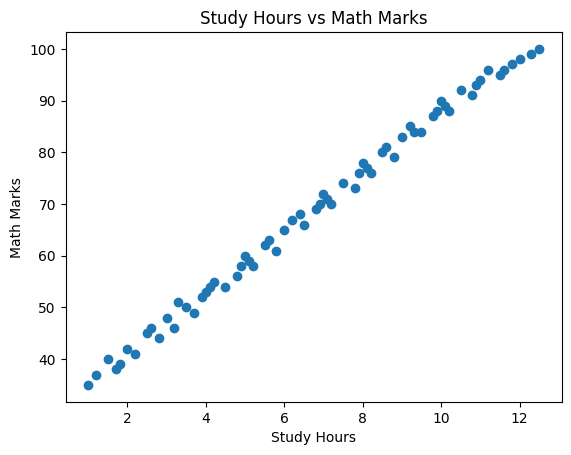

In [128]:
plt.scatter(df['study_hours'],df['math_marks'])
plt.xlabel('Study Hours')
plt.ylabel('Math Marks')
plt.title('Study Hours vs Math Marks')
plt.show()

3. 1. Check Missing Values

In [129]:
df.isna().sum()

study_hours    0
math_marks     0
dtype: int64

### **Step 03: Feature Engineering -**

1. Feature Selection

In [130]:
X = df[['study_hours']] # feature should be in DataFrame or 2D array
y = df['math_marks']    # target can be in Series or 1D array

2. Train Test Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42) 
# 80% train, 20% test random_state for reproducibility 

3. Scalling: Standardization

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create scaler object

In [134]:
X_train = scaler.fit_transform(X_train) # fit and transform the training data
X_test = scaler.transform(X_test)       # transform the test data

In [135]:
X_train[:5]

array([[ 0.82834254],
       [ 0.11355345],
       [-1.5957248 ],
       [-0.50800228],
       [ 1.29450933]])

In [136]:
X_test[:5]

array([[ 0.08247566],
       [-0.53908006],
       [-1.8132693 ],
       [ 1.69852055],
       [-1.44033587]])

### **Step 04: Model Training -**

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)  # create linear regression model object

In [138]:
model.fit(X_train, y_train)  # train the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


 Model Visualization

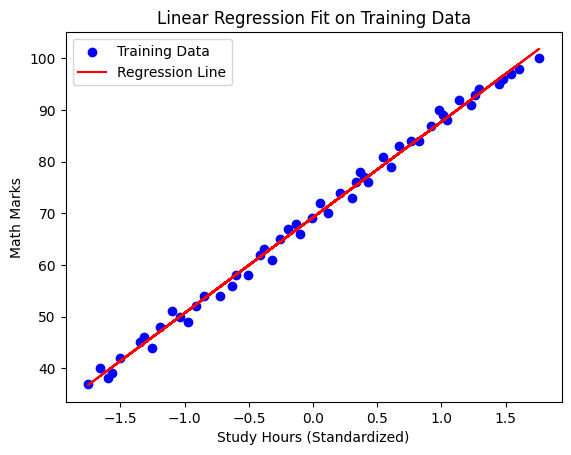

In [139]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Study Hours (Standardized)')
plt.ylabel('Math Marks')
plt.title('Linear Regression Fit on Training Data')
plt.legend()
plt.show()

In [140]:
model.coef_  # slope

array([18.53622155])

In [141]:
model.intercept_  # intercept

np.float64(69.21153846153847)

### **Step 05: Model Evaluation -**

1. Model Testing

In [142]:
y_pred = model.predict(X_test)  # make predictions on the test set

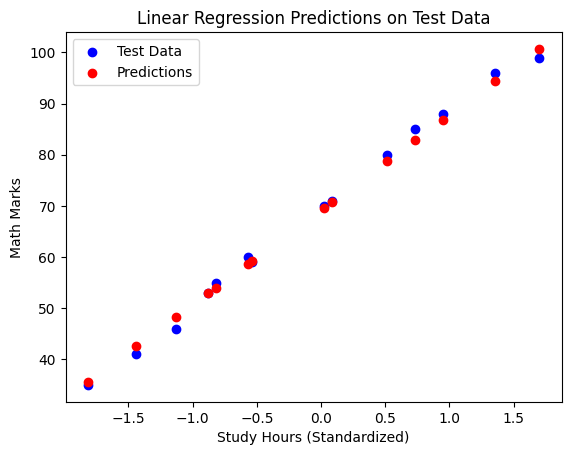

In [143]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Study Hours (Standardized)')
plt.ylabel('Math Marks')
plt.title('Linear Regression Predictions on Test Data')
plt.legend()
plt.show()

2. Performance Metrics

    2. 1. Error Calculation

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [145]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.110126016982829
Mean Squared Error: 1.7029219706087868
Root Mean Squared Error: 1.304960524540412


    2. 2. Accuracy Calculation

2. 2. 1. R Square

In [146]:
from sklearn.metrics import r2_score

In [147]:
score = r2_score(y_test, y_pred)
print(f'R^2 Score: {score}')

R^2 Score: 0.9955996848304682


2. 2. 2. Adjusted R Square

In [148]:
# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] where n = total datapoints, k = number of features
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Adjusted R^2 Score: {adj_r2}')

Adjusted R^2 Score: 0.995232991899674


3. New Prediction

In [149]:
result = model.predict(scaler.transform([[2]]))  # predict marks for 5 study hours
print(f'Predicted Math Marks for 5 Study Hours: {result[0]}')

Predicted Math Marks for 5 Study Hours: 41.361024235730824


/home/sib/04. REC--Machine-Learning-for-Robotics/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [150]:
result

array([41.36102424])